# Handling imbalanced insurance data

Dataset source: https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice/data?select=aug_train.csv

Explanation: https://www.kaggle.com/code/arashnic/handling-imbalanced-resampling-the-right-way

## Context

Insurance companies that sell life, health, and property and casualty insurance are using machine learning (ML) to drive improvements in customer service, fraud detection, and operational efficiency. The data provided by an Insurance company which is not excluded from other companies to getting advantage of ML. This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalized in that year, the insurance provider company will bear the cost of hospitalization etc. for up to Rs. 200,000. Now if you are wondering how can company bear such high hospitalization cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalized that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

## Content

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.

## Columns:

- **id**: ID of customer.
- **Gender**: Gender of customer.
- **Age**: Age of customer.
- **Driving_License**: Whether the customer has a driving license (1) or not (0).
- **Region_Code**: Region of customer.
- **Previously_Insured**: Whether the customer has been previously insured (1) or not (0).
- **Vehicle_Age**: Age of the customer's vehicle.
- **Vehicle_Damage**: Where the vehicle has suffered damages (Yes) or not (No).
- **Annual_Premium**: Value of the annual premium policy offered to the customer.
- **Policy_Sales_Channel**: Channel where it was offered the policy.
- **Vintage**: Days insured until now.
- **Response**: Whether the customer was interested about the offer (1) or not (0).

# Libraries and importing dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [3]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Exploratory Data Analysis

### Exploring distributions on numerical features

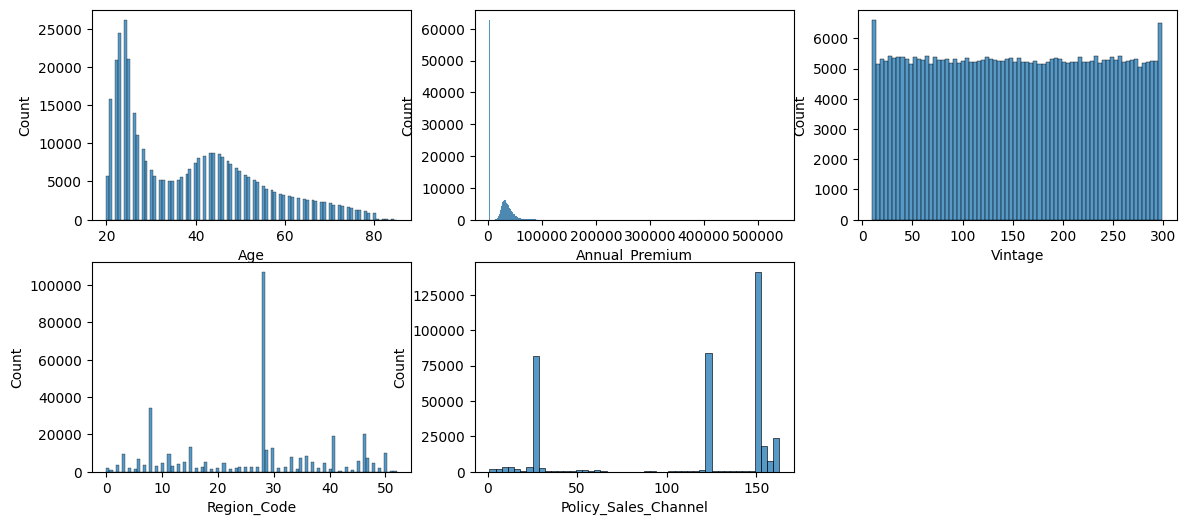

In [4]:
num_col = ["Age", "Annual_Premium", "Vintage", "Region_Code", "Policy_Sales_Channel"]
fig, ax = plt.subplots(2, 3, figsize=(14, 6))
for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        sns.histplot(data=train, x=num_col[i], ax=ax)
    else:
        ax.remove()

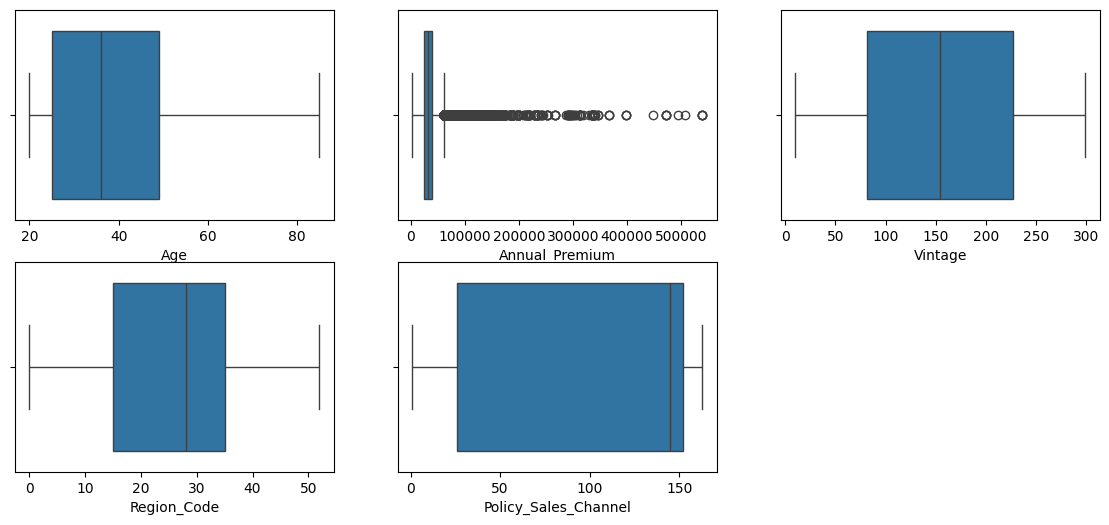

In [5]:
num_col = ["Age", "Annual_Premium", "Vintage", "Region_Code", "Policy_Sales_Channel"]
fig, ax = plt.subplots(2, 3, figsize=(14, 6))
for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        sns.boxplot(data=train, x=num_col[i], ax=ax)
    else:
        ax.remove()

- The distributions of the features "Age", "Annual_Premium", "Region_Code" and "Policy_Sales_Channel" should be anaylised.

### Exploring distributions on categorical features and the target variable

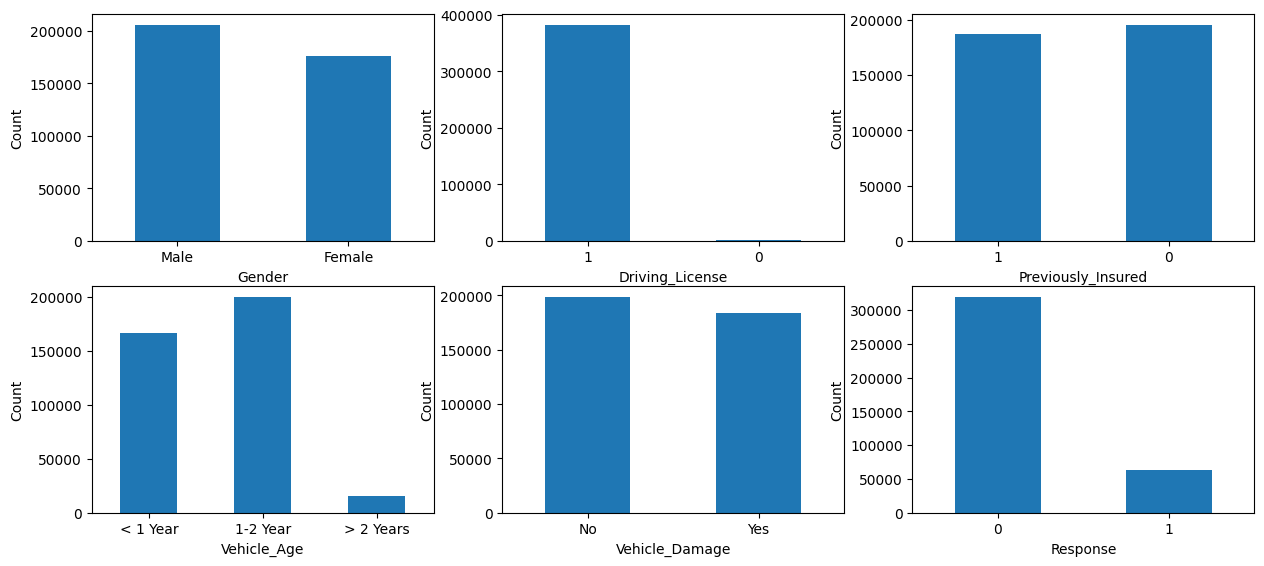

In [6]:
cat_col = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', "Response"]
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(fig.axes):
    if i < len(cat_col):
        train[cat_col[i]].value_counts(sort=False).plot(kind='bar', xlabel=cat_col[i], ylabel='Count', rot=0, ax=ax)
    else:
        ax.remove()

- There is a big imbalance of data on the feature "Driving_License" and the target variable "Response".
- Most of the policy offers went to people with a driving license.
- There are few people with cars older than 2 years.

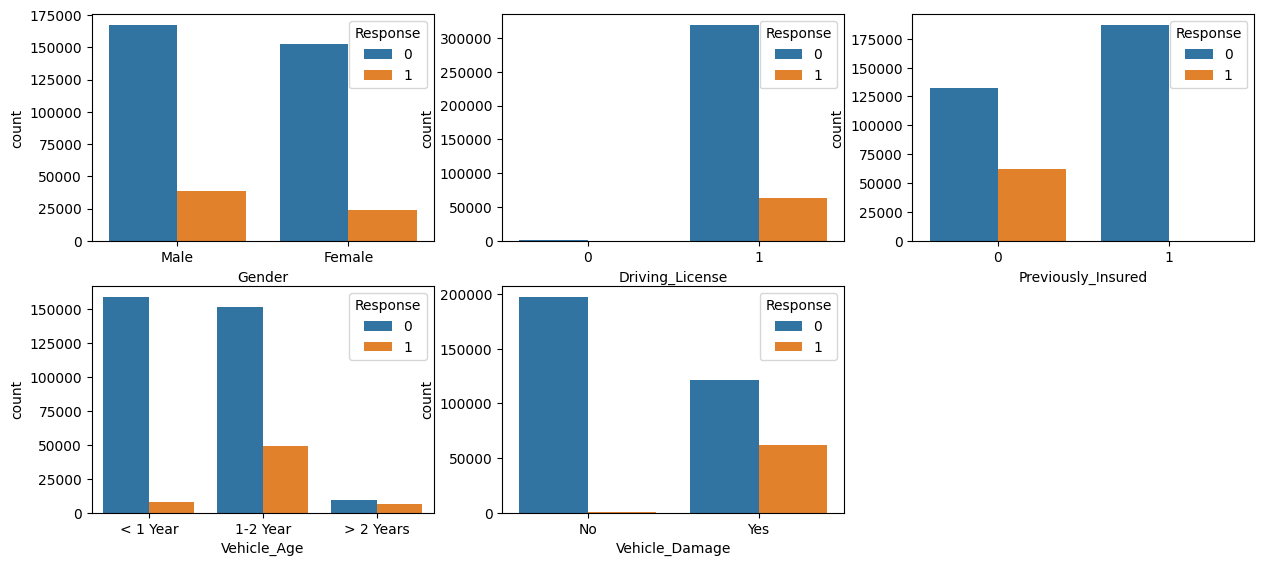

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(fig.axes):
    if i < len(cat_col)-1:
        sns.countplot(data=train, x=cat_col[i], hue='Response', ax=ax)
    else:
        ax.remove()

- Customers who were previously insured almost always rejected the offer.
- Also, customers who haven't suffered vehicle damages almost always rejected the offer.

### Age vs Response

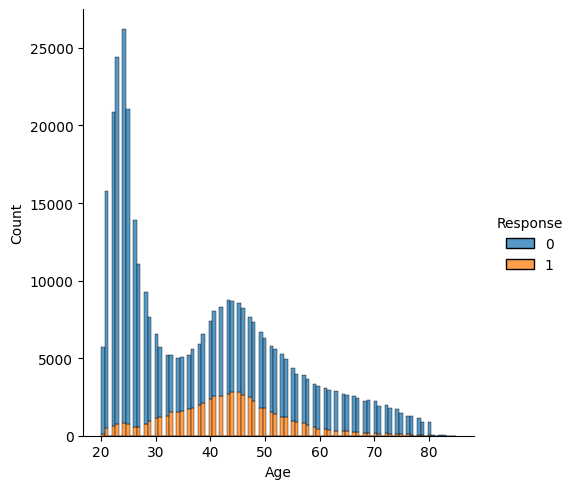

In [7]:
sns.displot(kind='hist', data=train, x='Age', hue='Response', multiple='stack')

* The sample shows that policies are offered more frequently to people between 20 and 30 years old in comparison to older people.

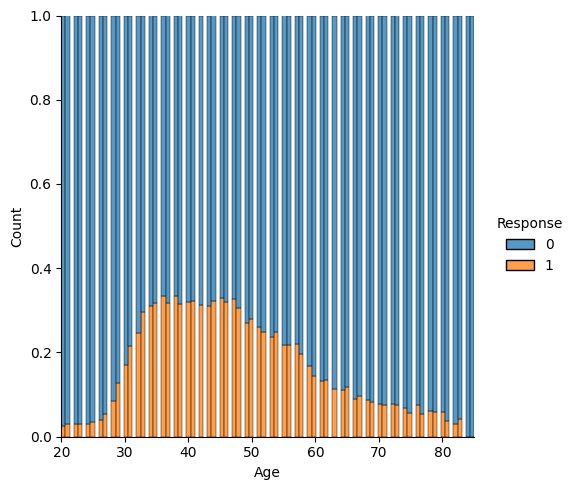

In [8]:
sns.displot(kind='hist', data=train, x='Age', hue='Response', multiple='fill')

- However, customers between 30 and 50 years old accept the policy offer more frequently in comparison to other ages.

### Annual Premium vs Response

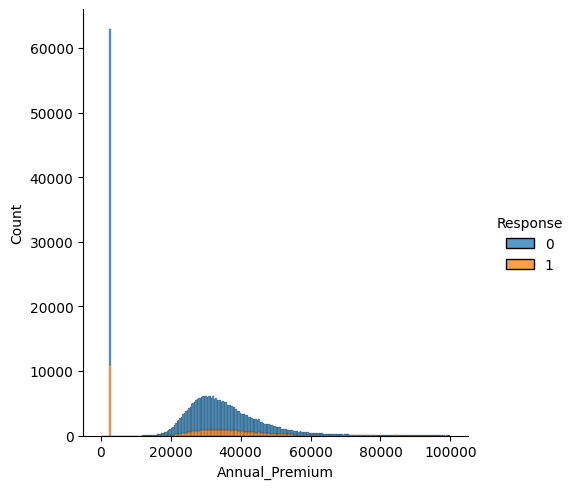

In [36]:
sns.displot(kind='hist', data=train, x='Annual_Premium', hue='Response', multiple='stack', binrange=[0,100000])

In [41]:
insurance.value_counts("Annual_Premium", sort=True)

Annual_Premium
2630.0     62876
69856.0      133
38452.0       47
45179.0       45
36086.0       40
           ...  
48172.0        1
18050.0        1
59812.0        1
18051.0        1
56057.0        1
Name: count, Length: 48993, dtype: int64

### Age vs Policy sales channel distribution

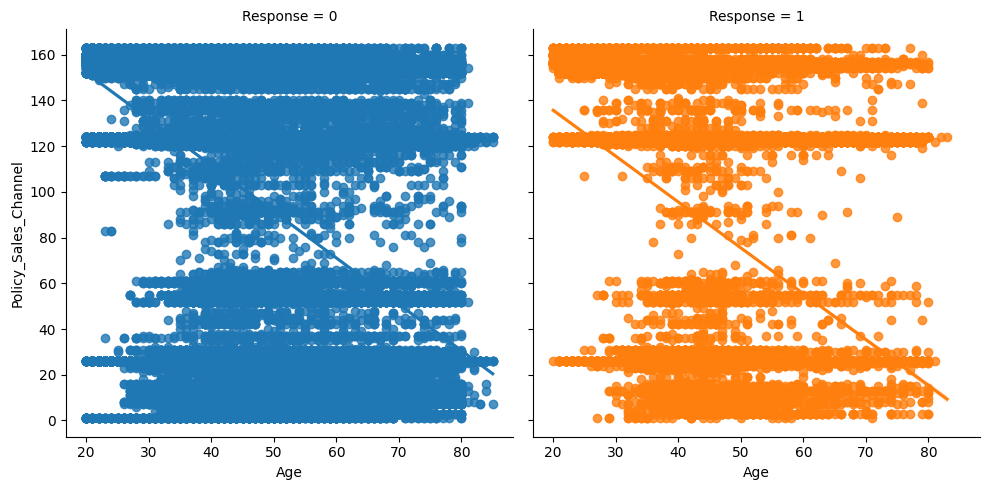

In [30]:
sns.lmplot(data=train, x='Age', y='Policy_Sales_Channel', col="Response", hue='Response')

- Although the correlation matrix shows a moderate correlation between the Age and the Policy Sales Channel, visually the dots are too scattered to show any kind of correlation. 